## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [65]:
cookies = pd.read_csv("../data/cookies.csv")

## Getting data insights

In [66]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [67]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

## One hot encoding of "mixins" column

In [68]:
cookies["mixins"].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [69]:
# getting dummies for one hot encoding, however some columns are named the same
dummie = cookies['mixins'].str.get_dummies(sep=',')
dummie

,chocolate,oats,peanut butter,raisins,chocolate,nuts,oats,peanut butter,raisins
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5193,0,0,0,0,0,0,0,1,0
5194,0,0,0,0,0,0,0,0,1
5195,0,1,0,0,1,0,0,0,0
5196,0,0,0,0,1,0,0,0,0


In [70]:
#renaming all columns
dummie.columns = ["chocolate", "oats", "peanut butter", "raisins", "chocolate_2", "nuts", "oats_2", "peanut butter_2", "raisins_2"]

In [71]:
#adding the columns that have the same ingredient
dummie["chocolate"] = dummie["chocolate"] + dummie["chocolate_2"]

In [72]:
dummie["oats"] = dummie["oats"] + dummie["oats_2"]
dummie["peanut butter"] = dummie["peanut butter"] + dummie["peanut butter_2"]
dummie["raisins"] = dummie["raisins"] + dummie["raisins_2"]

In [73]:
# dropping the doubles of the columns
dummie = dummie.drop(["chocolate_2", "oats_2", "peanut butter_2", "raisins_2"], axis=1)
dummie

,chocolate,oats,peanut butter,raisins,nuts
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,0
4,1,1,0,0,1
...,...,...,...,...,...
5193,0,0,1,0,0
5194,0,0,0,1,0
5195,1,1,0,0,0
5196,1,0,0,0,0


## Adding the new columns to the cookies dataframe

In [74]:
cookies = pd.concat([cookies, dummie], axis=1)

In [75]:
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,15.2,7,raisins,1.30,3,0,0,0,1,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,12.4,7,raisins,1.71,3,0,0,0,1,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,9.4,7,"nuts, chocolate",1.78,3,1,0,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,12.2,7,chocolate,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,19.8,7,"nuts, oats, chocolate",1.30,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,...,11.6,7,peanut butter,1.36,3,0,0,1,0,0
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,...,10.0,7,raisins,1.80,3,0,0,0,1,0
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,...,13.4,7,"chocolate, oats",1.07,3,1,1,0,0,0
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,...,13.8,7,chocolate,1.77,3,1,0,0,0,0


In [76]:
# dropping the mixins column
cookies.drop(['mixins'], axis = 1, inplace = True) 

In [77]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,1.30,3,0,0,0,1,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,1.71,3,0,0,0,1,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,1.78,3,1,0,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,1.30,3,1,1,0,0,1


In [78]:
# peanut butter --> drop
cookies["raisins"].value_counts()

0    3640
1    1558
Name: raisins, dtype: int64

## One hot encoding butter type

In [79]:
butter_dummie = cookies['butter type'].str.get_dummies()

In [80]:
butter_dummie

,cubed,melted
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
5193,1,0
5194,0,1
5195,0,1
5196,0,1


In [81]:
cookies = pd.concat([cookies, butter_dummie], axis=1)

In [82]:
cookies.drop(['butter type'], axis = 1, inplace = True) 

In [83]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,diameter,crunch factor,aesthetic appeal,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,7,1.30,3,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,7,1.71,3,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,7,1.78,3,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,7,1.59,3,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,7,1.30,3,1,1,0,0,1,1,0


## Finding and dropping nan values

In [84]:
cookies.isna().sum() #15 rows with nan values

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
weight                   0
diameter                 0
crunch factor            0
aesthetic appeal         0
chocolate                0
oats                     0
peanut butter            0
raisins                  0
nuts                     0
cubed                    0
melted                   0
dtype: int64

In [85]:
# dropping all the rows with NaN values, as there are "only" 15 rows compared to over 5000 this is not a huge number
cookies = cookies.dropna()

In [86]:
cookies.isna().sum() # no nan values left

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
weight                  0
diameter                0
crunch factor           0
aesthetic appeal        0
chocolate               0
oats                    0
peanut butter           0
raisins                 0
nuts                    0
cubed                   0
melted                  0
dtype: int64

In [87]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5183 entries, 0 to 5197
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5183 non-null   float64
 1   sugar index           5183 non-null   float64
 2   bake temp             5183 non-null   int64  
 3   chill time            5183 non-null   float64
 4   calories              5183 non-null   float64
 5   density               5183 non-null   float64
 6   pH                    5183 non-null   float64
 7   grams baking soda     5183 non-null   float64
 8   bake time             5183 non-null   float64
 9   quality               5183 non-null   int64  
 10  weight                5183 non-null   float64
 11  diameter              5183 non-null   int64  
 12  crunch factor         5183 non-null   float64
 13  aesthetic appeal      5183 non-null   int64  
 14  chocolate             5183 non-null   int64  
 15  oats                 

## Heatmap correlation and dropping columns

<AxesSubplot:>

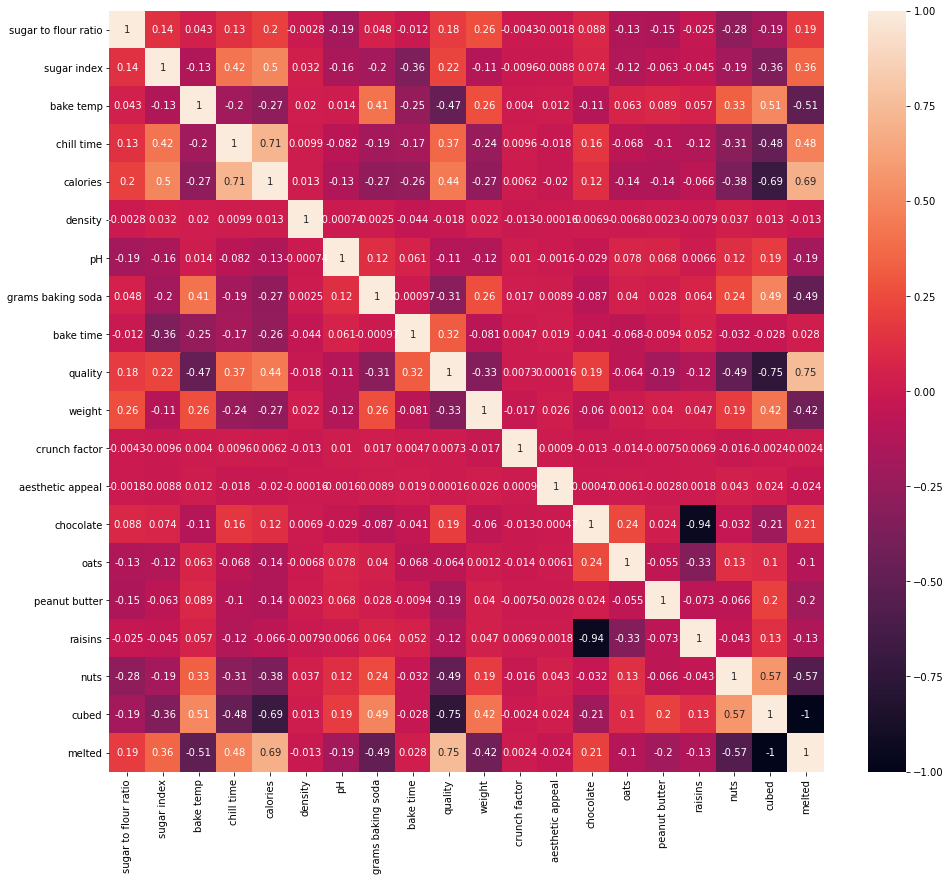

In [90]:
corr_matrix = cookies.corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True)


In [ ]:
# Comments:
# diameter is alwys the same --> drop

In [91]:
cookies.drop(['diameter'], axis = 1, inplace = True) 

KeyError: "['diameter'] not found in axis"

<ipython-input-26-e85dfc40b9d2>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

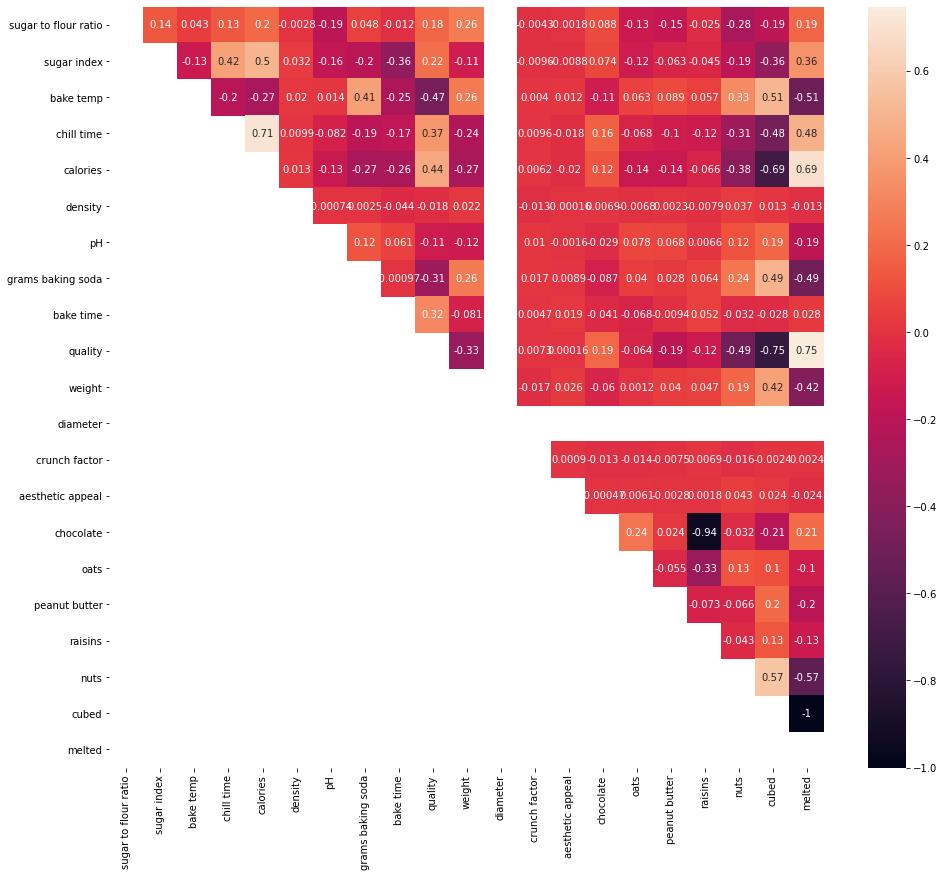

In [26]:
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True)

In [92]:
cookies.corrwith(cookies["quality"]).sort_values(ascending=False)

quality                 1.000000
melted                  0.747593
calories                0.440783
chill time              0.365616
bake time               0.315011
sugar index             0.220336
chocolate               0.194446
sugar to flour ratio    0.181124
crunch factor           0.007323
aesthetic appeal        0.000159
density                -0.017524
oats                   -0.063860
pH                     -0.114388
raisins                -0.122861
peanut butter          -0.186981
grams baking soda      -0.305847
weight                 -0.328742
bake temp              -0.471056
nuts                   -0.490865
cubed                  -0.747593
dtype: float64

In [93]:
cookies_corr = cookies.corr()
for i in cookies_corr:
    for index, row in cookies_corr[i].iteritems():
        if row > 0.7 and row != 1.0:
            print(i + " <--> " + index + " ------> " + str(row))


chill time <--> calories ------> 0.7132994301651558
calories <--> chill time ------> 0.7132994301651558
quality <--> melted ------> 0.7475928709636402
melted <--> quality ------> 0.7475928709636402


In [94]:
# dropping 'aesthetic appeal'
cookies.drop(['aesthetic appeal'], axis = 1, inplace = True)

<ipython-input-30-f236af11100f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

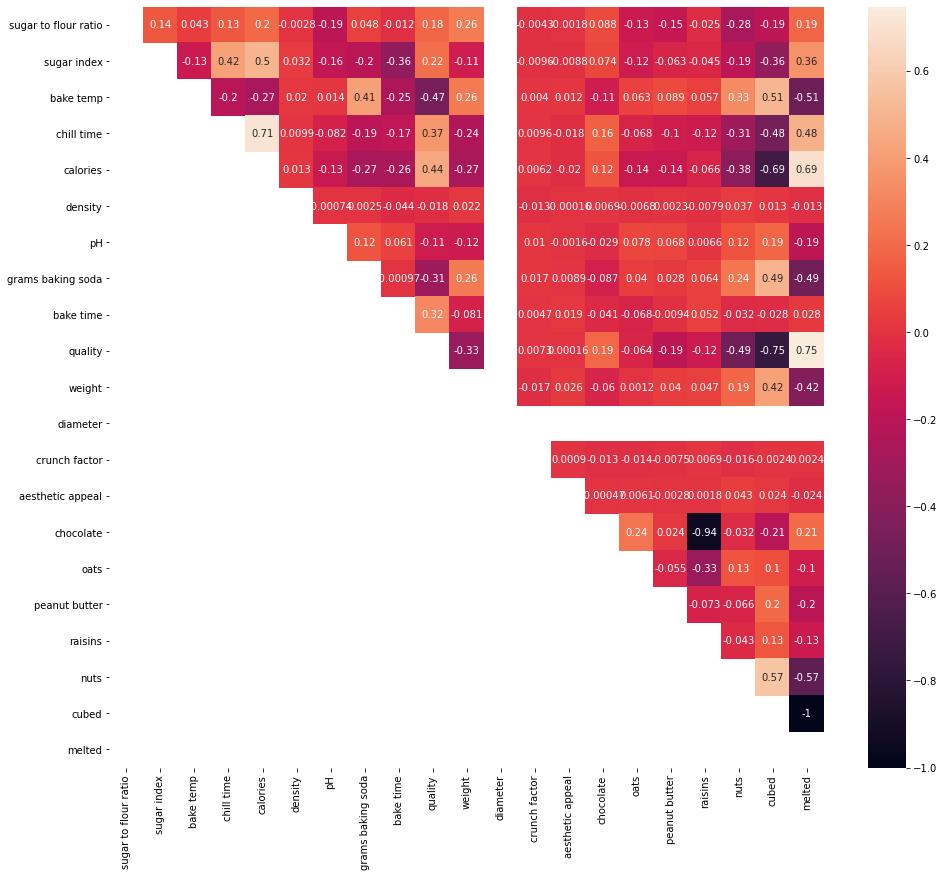

In [30]:
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True)

## Removing Outliers

In [95]:
from scipy import stats
cookies = cookies[(np.abs(stats.zscore(cookies)) < 3).all(axis=1)]

In [96]:
cookies.shape

(4846, 19)

## Two dataframes for comparison

In [ ]:
# first with all columns
# second without density, crunch factor, pH

In [97]:
cookies2 = cookies.copy()

In [ ]:
#cookies.drop(['aesthetic appeal'], axis = 1, inplace = True)

In [98]:
cookies2.drop(["density", "crunch factor", "pH"], axis =1, inplace= True)

In [99]:
cookies2.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.44,12.1,8,15.2,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.48,8.4,7,12.4,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.83,14.0,9,9.4,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.35,10.5,7,12.2,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.57,9.4,5,19.8,1,1,0,0,1,1,0


In [100]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,chocolate,oats,peanut butter,raisins,nuts,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,0,0,0,1,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,0,0,0,1,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,1,0,0,0,1,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,1,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,1,1,0,0,1,1,0


In [36]:
len(cookies)

4846

## Dropping mixins etc.

In [101]:
cookies3 = cookies.copy()

In [110]:
cookies3.drop(["sugar to flour ratio", "density", "pH", "crunch factor", "chocolate", "oats", "peanut butter", "raisins", "nuts"], axis=1, inplace=True)

## Exporting dataframes

In [37]:
cookies.to_csv("../data/cookies_processed.csv")

In [38]:
cookies2.to_csv("../data/cookies2_processed.csv")

In [112]:
cookies3.to_csv("../data/cookies3_processed.csv")

In [111]:
cookies3

,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,cubed,melted
0,9.5,300,15.0,136.0,0.44,12.1,8,15.2,0,1
1,3.3,520,34.0,113.0,0.48,8.4,7,12.4,0,1
2,1.9,360,33.0,106.0,0.83,14.0,9,9.4,0,1
3,10.5,490,41.0,124.0,0.35,10.5,7,12.2,0,1
4,2.4,770,6.0,33.0,0.57,9.4,5,19.8,1,0
...,...,...,...,...,...,...,...,...,...,...
5192,7.9,330,22.0,130.0,0.59,10.9,8,11.8,0,1
5194,1.5,490,10.0,97.0,0.44,10.7,8,10.0,0,1
5195,14.3,480,79.0,149.0,0.37,9.7,7,13.4,0,1
5196,1.4,560,35.0,136.0,0.78,10.3,8,13.8,0,1


In [37]:
dt_cookies2 = pd.read_csv("dt_cookies2_array.csv")